<a href="https://colab.research.google.com/github/annabeltramini/test/blob/main/Working_on_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import tensorflow
import torch 
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# creating list through list comprehension method
x_train = [image/255 for image in x_train]
x_test = [image/255 for image in x_test]
print(np.max(x_train[0]),np.max(x_test[0]))


1.0 1.0


In [ ]:
np.max(x_train[0])


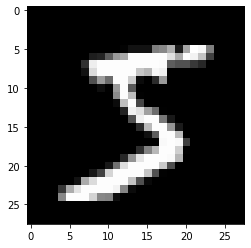

In [ ]:
first_image = x_train[0]
first_image = first_image.flatten()






first_image_r = first_image.reshape((28,28))
plt.imshow( x_train[0], cmap='gray')
plt.show()

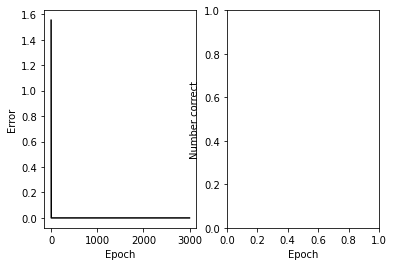

Target values
[[0]
 [1]
 [1]
 [0]]
Output values
[[1.11842238e-05]
 [9.99985076e-01]
 [9.99985051e-01]
 [2.31644494e-05]]
Final error:
3.328487883129977e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed so get same sequence of random numbers each time prog is run.
np.random.seed(1)

########## set input and output values ##########

# set input vectors for XOR
#Input array
X = np.array([[0,0], [0,1], [1,0] , [1,1]])

# set output values for XOR
targetvectors = np.array([[0],[1],[1],[0]])

# define unit activcation function as sigmoid function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# define derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

########## set parameters ##########
niter = 3000 # number of training iterations
plotinterval = 100 # interval between plotting graphs

errors = np.zeros(niter) # record of errors during training
numcorrects = np.zeros(niter) # number of correct outputs during training

# decide if want to have sigmoidal or linear output units
sigmoidalOutputUnits = 0

if (sigmoidalOutputUnits):
    lr = 0.5 # learning rate
else:
    lr = 0.1 # learning rate

inputlayer_neurons = X.shape[1] # number of units in input layer 
hiddenlayer_neurons = 2 # number of hidden layer units
output_neurons = 1 # number of units in output layer

# weight and bias initialization
# weights between input and hidden layer
wh = np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
# biases of hidden layer units
bh = np.random.uniform(size=(1,hiddenlayer_neurons))

# weights of output layer units
wout = np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
# biases of output layer units
bout = np.random.uniform(size=(1,output_neurons))

########## SET UP GRAPHS ##########
# set interactive plotting on, so graphs appear outside of console.
plt.ion()

fig, axes = plt.subplots(1,2)
axerror = axes[0]
axnumcorrect = axes[1]

axerror.set_xlabel('Epoch')
axerror.set_ylabel('Error')
        
axnumcorrect.set_ylabel('Number correct')
axnumcorrect.set_xlabel('Epoch')

# set state of bias unit; this code works if set to -1 or +1.
biasunitstate = -1.0

########## LEARN ##########
for iter in range(niter):

    # Forward Propogation
    hidden_layer_input1 = np.dot(X,wh) # input from input layer
    hidden_layer_input = hidden_layer_input1 + bh*biasunitstate # add input from bias unit
    hiddenlayer_states = sigmoid(hidden_layer_input)
    
    output_layer_input1 = np.dot(hiddenlayer_states,wout)
    output_layer_input= output_layer_input1 + bout * biasunitstate
    
    # Backpropagation
    # get derivatives of errors wrt unit inputs ...
    # ... of output layer
    if (sigmoidalOutputUnits):
        output = sigmoid(output_layer_input)
        slope_output_layer = derivatives_sigmoid(output)
    else: # output units are linear
        output = output_layer_input
        slope_output_layer = output*0 + 1 # each derivative = 1

    d = targetvectors - output # delta terms = errors in output layer
        
    # get derivatives of errors wrt unit inputs of hidden units
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_states)
    
    # get delta terms of output units = d_output
    d_output = d * slope_output_layer
    
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    
    # update weights of output units
    wout += hiddenlayer_states.T.dot(d_output) * lr
    # update biases of output units
    bout += np.sum(d_output, axis=0,keepdims=True) * biasunitstate * lr
    
    # update weights and biases of hidden units
    wh += X.T.dot(d_hiddenlayer) * lr    
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) * biasunitstate * lr

    error = np.linalg.norm(d)
    errors[iter] = error
    
    # count number of correct responses
    a = (output<0.5)
    b = (targetvectors<0.5)
    numcorrect = sum(a==b)
    numcorrects[iter] = numcorrect
    
    ########## Plot ##########
    if (iter % plotinterval == 0):
        axerror.plot(errors[0:niter],'k')
        plt.show()
        plt.pause(0.001)
        axnumcorrect.plot(numcorrects[0:niter],'k')
        plt.show()
        plt.pause(0.001)

########## Print results ##########
print('Target values')
print(targetvectors)
print('Output values')
print(output)
error=np.linalg.norm(d)
    #print(i)
print('Final error:')
print(error)
########## The End ##########

My perceptron

In [ ]:
import numpy as np 

#Weights and balances start randomly
weights_i2h = np.random.rand(3,8)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
weights_h2o = np.random.rand(8,3)
    #8 (one for each output unit)
    #3 units long (one for each input unit)
    
bias_hid = -1
bias_out = -1

def sigmoid(x):
    sigm = 1/(1+np.exp(-x))
    return sigm

def sigm_prime(x):
    sigm_prim = x*(1-x) #this is different from the R code, don't know if it's right
    return sigm_prim

def feedforward(inp):
    hidden_outputs = sigmoid(np.dot(weights_i2h, inp) + bias_hid) 
    # Calculate the final outputs 
    final_outputs = sigmoid(np.dot(weights_h2o, hidden_outputs) + bias_out) 
    return final_outputs

def backprop(inp,expected_outputs):
    global weights_i2h
    #global weights_h2o
    #global bias_hid
    #global bias_out
    #global final_outputs
    #global output_errors
    #global hidden_errors
    #global hidden_outputs

    hidden_outputs = sigmoid(np.dot(weights_i2h, inp) + bias_hid)
    final_outputs = sigmoid(np.dot(weights_h2o, hidden_outputs) + bias_out)
    output_errors = expected_outputs - final_outputs 
    hidden_errors = np.dot(weights_h2o.T, output_errors) #.T for transverse
    weights_h2o += np.dot(output_errors * sigm_prime(final_outputs), hidden_outputs.T)    
    bias_out += output_errors * sigm_prime(final_outputs)
    weights_inp_to_hid += np.dot(hidden_errors*sigm_prime(hidden_outputs), inp.T)
    bias_hid += hidden_errors * sigm_prime(hidden_outputs)

In [ ]:
from keras.utils import save_img
import numpy as np
import math
#Weights and balances start randomly
weights_i2h = np.random.rand(8,3)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
weights_h2o = np.random.rand(3,8)
    #8 (one for each output unit)
    #3 units long (one for each input unit)
learning = True

inputs = np.array([[1,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,0,0],
          [0,0,1,0,0,0,0,0],
          [0,0,0,1,0,0,0,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,0,0,1,0,0],
          [0,0,0,0,0,0,1,0],
          [0,0,0,0,0,0,0,1]])
d_Error_plot = list()
for _ in range(1000):
  d_Error = list()

  for input in inputs:
      target_output = input
      #print(input)
      hidden_input = np.dot(input,weights_i2h)
      
      hidden_output = sigmoid(hidden_input)
      final_input =  np.dot(hidden_output,weights_h2o)
      final_output = sigmoid(final_input) 

      delta_kt = target_output - final_output #1x8
      
      d_Error.append(sum(((delta_kt)**2)/8))
      #d_Error += sum(((delta_kt)**2)/8)
      
      delta_output = delta_kt * sigm_prime(final_output)
      #d_Error += delta_output
      #print("hidden output",hidden_output)
      #print("delta output", delta_output)
      delta_hidden = np.dot(delta_output,weights_h2o.T) * sigm_prime(hidden_output)

      weights_h2o += np.dot(hidden_output.reshape(3,1), delta_output.reshape(1,8))
      weights_i2h += np.dot(input.reshape(8,1), delta_hidden.reshape(1,3))
      #weights_h2o += np.dot(delta_kt * sigm_prime(final_output),hidden_output)
      #weights_h2o += np.dot(hidden_output, delta_output)
      #weights_i2h += np.dot(input,delta_hidden)
  d_Error_plot.append(np.mean(d_Error))
  #print(d_Error)
#ADD THE TOTAL WEIGHTS OF THE MODEL AND A WAY TO PLOT THEM

  #FORWARD
  #set input unit states it to th training vector
  #hidden_outputs = sigmoid(np.dot(weights_i2h, inp) + bias_hid) 
  #Get state of ouptu units
  #final_outputs = sigmoid(np.dot(weights_h2o, hidden_outputs) + bias_out) 

  #BACKWARD
  #Delta term dkt for each output unit



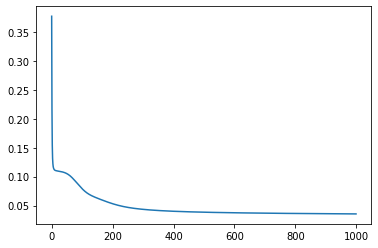

In [ ]:
import matplotlib.pyplot as plt

plt.plot(d_Error_plot)

In [ ]:
hidden_output = np.array([0.59886713,0.53077805,0.5770078 ])
delta_outout = np.array([-0.15101875,-0.15466433,0.03661054,0.17320429,-0.15272208,-0.15670015,-0.10684789 ,0.05574947])

np.dot(hidden_output.T,delta_outout.T)

ValueError: ignored

In [ ]:
np.concatenate((hidden_outputs, np.ones((hidden_outputs.shape[0],1))),axis=1)

array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.53661647, 0.95092041, 1.        ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.6308573 , 0.97996403, 1.        ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.69155333, 0.98520298, 1.        ]])

In [ ]:
###JOHANNA
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
def sigmoid(x): 
  return 1 / (1 + np.exp(-x))
def sigmoid_prime(x): 
  y = sigmoid(x)
  return y * (1 - y) 

class MLP: 
  def __init__(self , input_units , hidden_units , output_units): 
    self.weights1 = np.random.rand(hidden_units , input_units) 
    self.weights2 = np.random.rand(output_units , hidden_units + 1)
  
  
  def train(self , inputs , targets , epochs): 
    for _ in range(epochs):
      inputs = np.array(inputs , ndmin =2)
      targets = np.array(targets , ndmin =2)


      # Forward pass 
      hidden_inputs = np.dot(inputs , self.weights1.T) 
      hidden_outputs = sigmoid(hidden_inputs)
      hidden_outputs = np.concatenate (( hidden_outputs , np.ones(( hidden_outputs.shape [0] ,1))) , axis =1)
      final_inputs = np.dot(hidden_outputs , self.weights2.T) 
      final_outputs = sigmoid(final_inputs)
      # Backward pass 
      error = targets - final_outputs 
      delta_output = error * sigmoid_prime(final_inputs) 
      delta_hidden = np.dot(delta_output , self.weights2 [:,:-1]) * sigmoid_prime( hidden_inputs) #print(error) 
      
      # Update weights
      print("hidden outputs:",hidden_outputs)
      print("delta_output.T", delta_output.T)
      self.weights2 += np.dot(delta_output.T, hidden_outputs) 
      self.weights1 += np.dot(delta_hidden.T, inputs)
      #return error 
      
  def predict(self , inputs): 
      inputs = np.array(inputs , ndmin =2)
      hidden_inputs = np.dot(inputs , self.weights1.T) 
      hidden_outputs = sigmoid(hidden_inputs)
      hidden_outputs = np.concatenate (( hidden_outputs , np.ones(( hidden_outputs.shape [0] ,1))), axis =1)
      final_inputs = np.dot(hidden_outputs , self.weights2.T) 
      final_outputs = sigmoid(final_inputs)
      return final_outputs

In [ ]:
inputs = np.array([[0,0,0,0,0,0,0,1],
          [0,0,0,0,0,0,1,0],
          [0,0,0,0,0,1,0,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,1,0,0,0,0],
          [0,0,1,0,0,0,0,0],
          [0,1,0,0,0,0,0,0],
          [1,0,0,0,0,0,0,0]])

test = MLP(8,3,8)

test.train(inputs, inputs, 1)

test.predict(inputs)

hidden outputs: [[0.67389965 0.72907617 0.59809798 1.        ]
 [0.66436757 0.66509138 0.63971692 1.        ]
 [0.70197807 0.70354318 0.53315034 1.        ]
 [0.50047264 0.70772126 0.52088635 1.        ]
 [0.54343851 0.51626053 0.57416332 1.        ]
 [0.53106475 0.72745953 0.73024433 1.        ]
 [0.57438436 0.66405453 0.65395751 1.        ]
 [0.61690001 0.65713837 0.57178222 1.        ]]
delta_output.T [[-0.11487558 -0.11630888 -0.11708846 -0.12151608 -0.12598819 -0.11423363
  -0.11786822  0.02554423]
 [-0.09103121 -0.09120153 -0.09539303 -0.09652383 -0.10068945 -0.08452669
   0.01192963 -0.09530227]
 [-0.12250888 -0.12154388 -0.12342784 -0.13290753 -0.12951238  0.02935751
  -0.12538958 -0.12617314]
 [-0.10479798 -0.10482617 -0.10797977 -0.11153631  0.02193953 -0.10111529
  -0.10562099 -0.10883762]
 [-0.14377199 -0.14357073 -0.14440415  0.0644603  -0.14687717 -0.14434889
  -0.1450025  -0.14547448]
 [-0.14397595 -0.14441631  0.05610525 -0.14572692 -0.14704672 -0.1427376
  -0.14457091 

array([[0.4538221 , 0.63756536, 0.39631386, 0.53444762, 0.2395931 ,
        0.24105351, 0.28003596, 0.31556842],
       [0.45239219, 0.64063885, 0.40525189, 0.5389395 , 0.24472554,
        0.24191472, 0.2833213 , 0.32828499],
       [0.45226658, 0.62540748, 0.39945012, 0.52775271, 0.24194763,
        0.2405377 , 0.27486681, 0.30926902],
       [0.45753523, 0.63972352, 0.38147899, 0.53583955, 0.23770293,
        0.25636664, 0.29484411, 0.32893301],
       [0.4511331 , 0.63440017, 0.41253506, 0.54064679, 0.25524143,
        0.25549929, 0.29560141, 0.35573643],
       [0.45768978, 0.66480691, 0.38919497, 0.55157335, 0.2371361 ,
        0.24897352, 0.29923751, 0.3425218 ],
       [0.4547881 , 0.64927349, 0.3978723 , 0.54417464, 0.24305251,
        0.24893844, 0.29341611, 0.33975608],
       [0.4532437 , 0.63466423, 0.39962434, 0.53522222, 0.24433313,
        0.24725253, 0.2856222 , 0.32783398]])

In [ ]:
#Weights and balances start randomly
weights_i2h = np.random.rand(3,8)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
weights_h2o = np.random.rand(8,3)
    #8 (one for each output unit)
    #3 units long (one for each input unit)
    
bias_hid = -1
bias_out = -1


inputs = np.array([[0,0,0,0,0,0,0,1],
          [0,0,0,0,0,0,1,0],
          [0,0,0,0,0,1,0,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,1,0,0,0,0],
          [0,0,1,0,0,0,0,0],
          [0,1,0,0,0,0,0,0],
          [1,0,0,0,0,0,0,0]])
expected_outputs = inputs

#inputs = first_image
#expected_outputs = first_image

for _ in range(1000): 
    test = backprop(inputs, expected_outputs)
    
feedforward(inputs)
    
print(final_outputs)

ValueError: ignored

(784,)


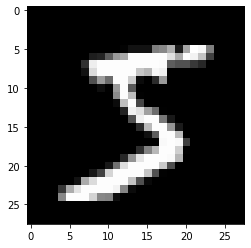

In [ ]:
first_image = x_train[0]
first_image = first_image.flatten()
print(first_image.shape)





first_image_r = first_image.reshape((28,28))
plt.imshow( x_train[0], cmap='gray')
plt.show()

In [110]:
img = cv2.imread("/content/drive/MyDrive/cat50.jpg")
#plt.plot(img)

# Convert the RGB image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to a numpy array
img_np1 = np.array(gray)
img_np1 = img_np1.ravel()
img_np = to_categorical(img_np1, num_classes = 256)
#cv2_imshow(gray)
img_np.shape
gray.shape

(50, 50)

In [ ]:
#IT COULD BE AN IDEA TO ENCODE THE BITS IN A CATEGORICAL WAY
#I DO NOT HTIK THIS IS THE WAY
from tensorflow.keras.utils import to_categorical
import numpy as np
#img_np2 = img_np1.ravel()
#print(img_np2[1:10])
#test = np.array([24,2])
input_test = to_categorical(first_image, num_classes = 256)

#for i in input_test:
  #print(np.argmax(i))



train_255 = range(0,256)
train_255 = to_categorical(train_255, num_classes = 256)

print(train_255.shape)
print(len(train_255[0]))


print(train_255[0])
print(np.argmax(train_255[0]))
#weights_i2h, weights_h2o, d_Error_plot = train(train_255,16,200)



(256, 256)
256
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0


In [114]:
import numpy as np

def sigmoid(x):
    sigm = 1/(1+np.exp(-x))
    return sigm

def sigm_prime(x):
    sigm_prim = x*(1-x) #this is different from the R code, don't know if it's right
    return sigm_prim

def train(inputs,hidden_num, epochs):
  
  #Weights and balances start randomly
  #print(inputs.shape[1])
  weights_i2h = np.random.rand(inputs.shape[1],hidden_num)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
  weights_h2o = np.random.rand(hidden_num,inputs.shape[1])
    #8 (one for each output unit)
    #3 units long (one for each input unit)
#learning = True


  d_Error_plot = list()
  for _ in range(epochs):
    d_Error = list()
   # d_Error_round = list()
    for input in inputs:
      #print(input)
      target_output = input
      #print(input)
      hidden_input = np.dot(input,weights_i2h)
      
      hidden_output = sigmoid(hidden_input)
      final_input =  np.dot(hidden_output,weights_h2o)
      final_output = sigmoid(final_input) 

      delta_kt = target_output - final_output #1x8
      
      #d_Error = np.mean(np.abs(delta_kt))
      d_Error.append(np.mean(np.abs(delta_kt)))

      delta_output = delta_kt * sigm_prime(final_output)
      delta_hidden = np.dot(delta_output,weights_h2o.T) * sigm_prime(hidden_output)

      weights_h2o += np.dot(hidden_output.reshape(hidden_num,1), delta_output.reshape(1,inputs.shape[1]))
      weights_i2h += np.dot(input.reshape(inputs.shape[1],1), delta_hidden.reshape(1,hidden_num))

    d_Error_plot.append(np.mean(np.abs(d_Error)))
  return weights_i2h, weights_h2o, d_Error_plot

#weights_i2h, weights_h2o, d_Error_plot = train(input_test,200,1)

weights_i2h, weights_h2o, d_Error_plot = train(train_255,16,5000)



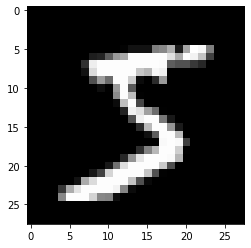

255
0


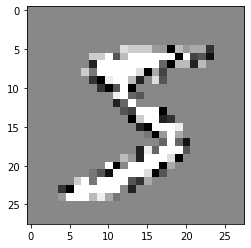

15
0


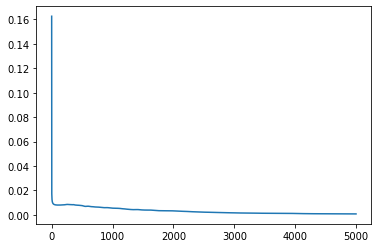

In [115]:
import matplotlib.pyplot as plt

def autoencoder(input):
    hidden_layer = sigmoid(np.dot(input,weights_i2h))
    outputs = sigmoid(np.dot(hidden_layer, weights_h2o))
    return(hidden_layer,outputs)

hidden_layers = []
outputs_list = []
hidden_pixels = []

for i in input_test:
  #print(i)
  hidden_layer, outputs = autoencoder(i)
  hidden_layers.append(hidden_layer)
  hidden_pixels.append(np.argmax(hidden_layer))
  outputs_list.append(np.argmax(outputs))
  #print(np.argmax(i))
  

outputs_list = np.array(outputs_list)
image_predicted = outputs_list.reshape(28,28)
plt.imshow(image_predicted, cmap = "gray")
plt.show()
print(max(outputs_list))
print(min(outputs_list))
#print(np.argmax(outputs_list[1]))

hidden_pixels = np.array(hidden_pixels)
image_hidden_predicted = hidden_pixels.reshape(28,28)
#print(hidden_pixels.shape)

plt.imshow(image_hidden_predicted, cmap = "gray")
plt.show()
print(max(hidden_pixels))
print(min(hidden_pixels))
hidden_layer, outputs = autoencoder(input_test[0])

#print(inputs[o])
#print(outputs)
plt.plot(d_Error_plot)
plt.show()

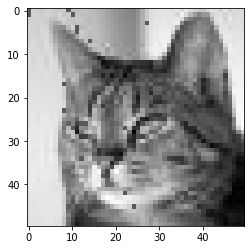

251
1


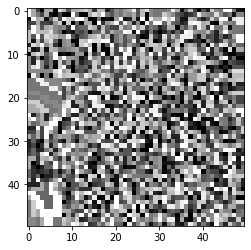

15
0


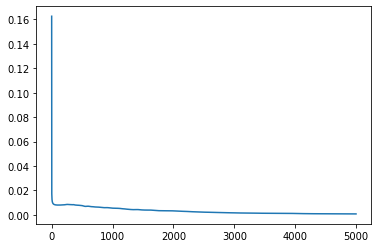

In [116]:
import matplotlib.pyplot as plt

def autoencoder(input):
    hidden_layer = sigmoid(np.dot(input,weights_i2h))
    outputs = sigmoid(np.dot(hidden_layer, weights_h2o))
    return(hidden_layer,outputs)

hidden_layers = []
outputs_list = []
hidden_pixels = []

for i in img_np:
  #print(i)
  hidden_layer, outputs = autoencoder(i)
  hidden_layers.append(hidden_layer)
  hidden_pixels.append(np.argmax(hidden_layer))
  outputs_list.append(np.argmax(outputs))
  #print(np.argmax(i))
  

outputs_list = np.array(outputs_list)
image_predicted = outputs_list.reshape(50,50)
plt.imshow(image_predicted, cmap = "gray")
plt.show()
print(max(outputs_list))
print(min(outputs_list))
#print(np.argmax(outputs_list[1]))

hidden_pixels = np.array(hidden_pixels)
image_hidden_predicted = hidden_pixels.reshape(50,50)
#print(hidden_pixels.shape)

plt.imshow(image_hidden_predicted, cmap = "gray")
plt.show()
print(max(hidden_pixels))
print(min(hidden_pixels))
hidden_layer, outputs = autoencoder(input_test[0])

#print(inputs[o])
#print(outputs)
plt.plot(d_Error_plot)
plt.show()

# PERCEPTRON LATEST DRAFT

In [ ]:
import numpy as np

def sigmoid(x):
    sigm = 1/(1+np.exp(-x))
    return sigm

def sigm_prime(x):
    sigm_prim = x*(1-x) #this is different from the R code, don't know if it's right
    return sigm_prim


inputs = np.array([[1,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,0,0],
          [0,0,1,0,0,0,0,0],
          [0,0,0,1,0,0,0,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,0,0,1,0,0],
          [0,0,0,0,0,0,1,0],
          [0,0,0,0,0,0,0,1]])

def train(inputs,hidden_num, epochs):
  #Weights and balances start randomly
  weights_i2h = np.random.rand(inputs.shape[1],hidden_num)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
  weights_h2o = np.random.rand(hidden_num,inputs.shape[1])
    #8 (one for each output unit)
    #3 units long (one for each input unit)
#learning = True


  d_Error_plot = list()
  for _ in range(epochs):
    d_Error = list()
   # d_Error_round = list()
    for input in inputs:
      #print(input)
      target_output = input
      #print(input)
      hidden_input = np.dot(input,weights_i2h)
      
      hidden_output = sigmoid(hidden_input)
      final_input =  np.dot(hidden_output,weights_h2o)
      final_output = sigmoid(final_input) 

      delta_kt = target_output - final_output #1x8
      
      #d_Error = np.mean(np.abs(delta_kt))
      d_Error.append(np.mean(np.abs(delta_kt)))

      delta_output = delta_kt * sigm_prime(final_output)
      delta_hidden = np.dot(delta_output,weights_h2o.T) * sigm_prime(hidden_output)

      weights_h2o += np.dot(hidden_output.reshape(hidden_num,1), delta_output.reshape(1,inputs.shape[1]))
      weights_i2h += np.dot(input.reshape(inputs.shape[1],1), delta_hidden.reshape(1,hidden_num))

    d_Error_plot.append(np.mean(np.abs(d_Error)))
  return weights_i2h, weights_h2o, d_Error_plot


weights_i2h, weights_h2o, d_Error_plot = train(inputs,3,1000)

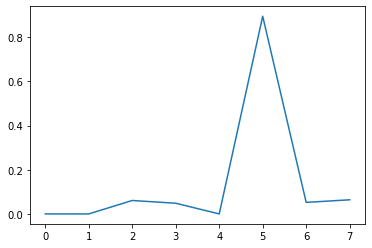

In [ ]:
import matplotlib.pyplot as plt

def autoencoder(input):
    hidden_layer = sigmoid(np.dot(input,weights_i2h))
    outputs = sigmoid(np.dot(hidden_layer, weights_h2o))
    return(hidden_layer,outputs)

hidden_layer, outputs = autoencoder(inputs[5])
#print(inputs[o])
#print(outputs)
plt.plot(outputs)

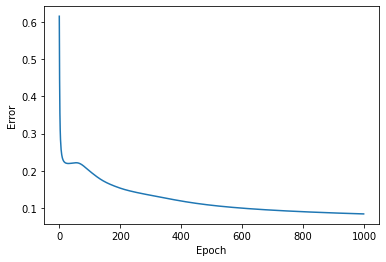

In [ ]:
  plt.plot(range(1000), d_Error_plot)
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[0.78431373 0.80784314 0.79215686 ... 0.85882353 0.83529412 0.83529412]
 [0.78431373 0.80784314 0.8        ... 0.83529412 0.84705882 0.84705882]
 [0.79607843 0.81176471 0.80784314 ... 0.83921569 0.85490196 0.85490196]
 ...
 [0.87058824 0.8745098  0.87843137 ... 0.10588235 0.09019608 0.09019608]
 [0.86666667 0.86666667 0.87058824 ... 0.09803922 0.0745098  0.09803922]
 [0.86666667 0.86666667 0.87058824 ... 0.0627451  0.05098039 0.0745098 ]]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


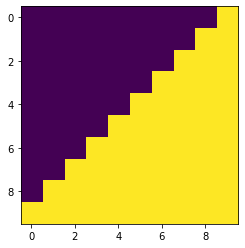

In [ ]:
#import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread("/content/drive/MyDrive/cat50.jpg")
#plt.plot(img)

# Convert the RGB image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


output_array = np.array([[0,0,0,0,0,0,0,0,0,1],
                        [0,0,0,0,0,0,0,0,1,1],
                        [0,0,0,0,0,0,0,1,1,1],
                        [0,0,0,0,0,0,1,1,1,1],
                        [0,0,0,0,0,1,1,1,1,1],
                        [0,0,0,0,1,1,1,1,1,1],
                        [0,0,0,1,1,1,1,1,1,1],
                        [0,0,1,1,1,1,1,1,1,1],
                        [0,1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1,1]])


# Convert the image to a numpy array
img_np1 = np.array(gray)
img_np = img_np1/255
#cv2_imshow(gray)
plt.imshow(output_array)
img_np.shape

print(img_np[0:100])
#output_array = np.reshape(img_np, (1, -1))
#output_array = img_np
output_array = output_array.ravel()
output_array.shape
print(output_array)

In [ ]:
import numpy as np

#inputs = output_array

bias_i2h = np.random.rand(1000) * 0.1
bias_h2o = np.random.rand(2500) * 0.1

#output_array = img_np.ravel()

output_array = np.array([[0,0,0,0,0,0,0,0,0,1],
                         [0,0,0,0,0,0,0,0,1,1],
                         [0,0,0,0,0,0,0,1,1,1],
                         [0,0,0,0,0,0,1,1,1,1],
                         [0,0,0,0,0,1,1,1,1,1],
                         [0,0,0,0,1,1,1,1,1,1],
                         [0,0,0,1,1,1,1,1,1,1],
                         [0,0,1,1,1,1,1,1,1,1],
                         [0,1,1,1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1,1,1,1]])

#print(output_array.shape)

def sigmoid(x):
    sigm = 1/(1+np.exp(-x))
    return sigm

def sigm_prime(x):
    sigm_prim = x*(1-x) #this is different from the R code, don't know if it's right
    return sigm_prim

def encoder(img):
  return sigmoid(np.dot(img,weights_i2h)+bias_i2h)

def decoder(img):
  return sigmoid(np.dot(img, weights_h2o)+ bias_h2o)

def train(img,hidden_num, epochs):
  #Weights and balances start randomly
  weights_i2h = np.random.rand(2500,hidden_num)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
  weights_h2o = np.random.rand(hidden_num,2500)
    #8 (one for each output unit)
    #3 units long (one for each input unit)

  bias_i2h = np.random.rand(hidden_num) * 0.1
  bias_h2o = np.random.rand(2500) * 0.1
#learning = True
  threshold = 0.5

  d_Error_plot = list()
  precisions = list()
  for _ in range(epochs):
    #d_Error = list()
   # d_Error_round = list()
    #for input in inputs:
      #print(input)
    #target_output = input
      #print(input)
    #hidden_input = np.dot(input,weights_i2h)
      
    #hidden_output = sigmoid(hidden_input)
    encoded = encoder(img)


    #final_input =  np.dot(hidden_output,weights_h2o)
    #final_output = sigmoid(final_input)
    decoded = decoder(encoded)

    #delta_kt = target_output - final_output #1x8
    error = img - decoded
    mean_sq_e = np.mean(error**2)
    d_Error_plot.append(mean_sq_e)
    #or:
    #d_Error_plot.append(np.mean(np.abs(error)))
    #print(delta_kt)  
    #print( np.mean(np.abs(delta_kt)))

    #d_Error = np.mean(np.abs(delta_kt))
    #d_Error = np.mean(np.abs(delta_kt))

    ###PRECISION
    correct_predictions = np.sum((decoded > threshold) == img)
    precision = correct_predictions / len(img)
    precisions.append(precision)

    #delta_output = delta_kt * sigm_prime(final_output)
    delta_output = np.dot(encoded.reshape(hidden_num,1), (error * sigm_prime(decoded).reshape(1,2500)))
    
    #delta_hidden = np.dot(delta_output,weights_h2o.T) * sigm_prime(hidden_output)
    error = np.dot(error,weights_h2o.T)
    delta_hidden = np.dot(img.reshape(2500,1), (error * sigm_prime(encoded)).reshape(1,hidden_num))
    #delta_hidden = np.dot(img.T, error*sigm_prime(encoded))

    #weights_h2o += np.dot(hidden_output.reshape(hidden_num,1), delta_output.reshape(1,2500))
    #weights_i2h += np.dot(img.reshape(2500,1), delta_hidden.reshape(1,hidden_num))
    weights_i2h += delta_hidden
    weights_h2o += delta_output
    #d_Error_plot.append(d_Error)
  return weights_i2h, weights_h2o, d_Error_plot


weights_i2h, weights_h2o, d_Error_plot = train(output_array,1000,100)

ValueError: ignored

In [ ]:
import numpy as np

#inputs = output_array

bias_i2h = np.random.rand(100) * 0.1
bias_h2o = np.random.rand(100) * 0.1


weights_i2h = np.random.rand(100,30)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
weights_h2o = np.random.rand(30,100)



#output_array = img_np.ravel()

output_array = np.array([[0,0,0,0,0,0,0,0,0,1],
                         [0,0,0,0,0,0,0,0,1,1],
                         [0,0,0,0,0,0,0,1,1,1],
                         [0,0,0,0,0,0,1,1,1,1],
                         [0,0,0,0,0,1,1,1,1,1],
                         [0,0,0,0,1,1,1,1,1,1],
                         [0,0,0,1,1,1,1,1,1,1],
                         [0,0,1,1,1,1,1,1,1,1],
                         [0,1,1,1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1,1,1,1]])
output_array = output_array.ravel()
print(output_array.shape)

def sigmoid(x):
    sigm = 1/(1+np.exp(-x))
    return sigm

def sigm_prime(x):
    sigm_prim = x*(1-x) #this is different from the R code, don't know if it's right
    return sigm_prim

def encoder(img):
  return sigmoid(np.dot(img,weights_i2h)+bias_i2h)

def decoder(img):
  return sigmoid(np.dot(img, weights_h2o)+ bias_h2o)

def train(img,hidden_num, epochs):
  #Weights and balances start randomly
  weights_i2h = np.random.rand(100,hidden_num)
    #3 (one for each hidden unit)
    #8 units long (one for each input unit)
  weights_h2o = np.random.rand(hidden_num,100)
    #8 (one for each output unit)
    #3 units long (one for each input unit)

  bias_i2h = np.random.rand(hidden_num) * 0.1
  bias_h2o = np.random.rand(100) * 0.1
#learning = True
  threshold = 0.5

  d_Error_plot = list()
  precisions = list()
  for _ in range(epochs):
    #d_Error = list()
   # d_Error_round = list()
    #for input in inputs:
      #print(input)
    #target_output = input
      #print(input)
    #hidden_input = np.dot(input,weights_i2h)
      
    #hidden_output = sigmoid(hidden_input)
    encoded = encoder(img)


    #final_input =  np.dot(hidden_output,weights_h2o)
    #final_output = sigmoid(final_input)
    decoded = decoder(encoded)

    #delta_kt = target_output - final_output #1x8
    error = img - decoded
    mean_sq_e = np.mean(error**2)
    d_Error_plot.append(mean_sq_e)
    #or:
    #d_Error_plot.append(np.mean(np.abs(error)))
    #print(delta_kt)  
    #print( np.mean(np.abs(delta_kt)))

    #d_Error = np.mean(np.abs(delta_kt))
    #d_Error = np.mean(np.abs(delta_kt))

    ###PRECISION
    correct_predictions = np.sum((decoded > threshold) == img)
    precision = correct_predictions / len(img)
    precisions.append(precision)

    #delta_output = delta_kt * sigm_prime(final_output)
    delta_output = np.dot(encoded.reshape(hidden_num,1), (error * sigm_prime(decoded).reshape(1,100)))
    
    #delta_hidden = np.dot(delta_output,weights_h2o.T) * sigm_prime(hidden_output)
    error = np.dot(error,weights_h2o.T)
    delta_hidden = np.dot(img.reshape(100,1), (error * sigm_prime(encoded)).reshape(1,hidden_num))
    #delta_hidden = np.dot(img.T, error*sigm_prime(encoded))

    #weights_h2o += np.dot(hidden_output.reshape(hidden_num,1), delta_output.reshape(1,2500))
    #weights_i2h += np.dot(img.reshape(2500,1), delta_hidden.reshape(1,hidden_num))
    weights_i2h += delta_hidden
    weights_h2o += delta_output
    #d_Error_plot.append(d_Error)
  return weights_i2h, weights_h2o, d_Error_plot


weights_i2h, weights_h2o, d_Error_plot = train(output_array,30,100)

(100,)


ValueError: ignored

In [ ]:
#weights_i2h, weights_h2o, d_Error_plot = train(output_array,2500,1000)

hidden_layer, outputs = autoencoder(output_array)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

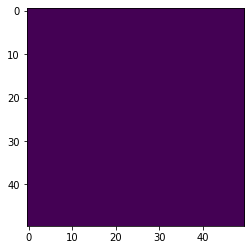

In [ ]:
final_image = np.reshape(outputs, (50,50))

plt.imshow(final_image)

outputs.shape
outputs[1:100]

ValueError: ignored

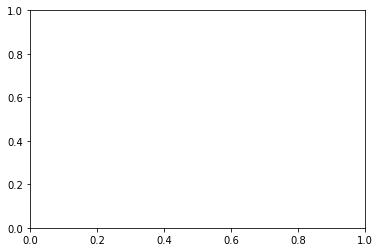

In [ ]:
  import matplotlib.pyplot as plt
  plt.plot(range(1000), d_Error_plot)
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.show()

  print(min(d_Error_plot))